In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from dataclasses import dataclass
from typing import Tuple
import random


import artifact
import sampler
import char
import damage
import stats
import solver

from IPython import display

In [16]:
import importlib
importlib.reload(solver)

<module 'solver' from '/Users/albertxu/PycharmProjects/playground/Genshin/solver.py'>

In [63]:
# Diluc base stats at A5 L80. With Lvl 90 prototype archaic.
diluc = [
    0, 11453,
    0, 692,
    0 + 276, 295 + 565,
    194, 500,
    0, 0,
    0, 0, 0, 0, 0, 0, 0, 0, 0,
]
diluc = stats.Stats(np.array(diluc, dtype=np.float32))

# lvl 90, talent lvl 9. weap=R5 L90 sharpshooter's
diona = [
    0, 9570,
    0, 601,
    0, 212 + 401,
    50, 500 + 469,
    0, 0,
    0, 0, 0, 0, 240, 0, 0, 0, 0,
]
diona = stats.Stats(np.array(diona, dtype=np.float32))

formula = sum([damage.DilucN1(i) for i in range(4)])
c = char.Character(diluc, formula)

# formula = damage.DionaCharged(.5)
# c = char.Character(diona, formula)

In [64]:
c.artis

Loadout(dmg=-1, artis=(None, None, None, None, None))

In [65]:
# c.artis = [None for _ in range(5)]
f'Base dmg: {c.eval()}'

'Base dmg: 7174.671286138608'

In [61]:
formula = damage.DionaCharged(1)
slv2 = solver.Top1(diona, formula)
vss2 = [slv2.step() for _ in range(2000)]

In [71]:
slv3 = solver.Top1(diluc, formula)
vss3 = [slv3.step() for _ in range(30000)]

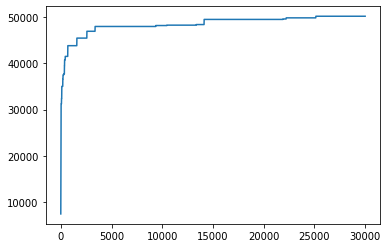

In [72]:
plt.plot(vss3)

In [75]:
slv3.top1

Loadout(dmg=50091.05817352438, artis=(HP Flower@(ATK%:53>169, ATK:19>19, CR:27>58, CD:78>218), ATK Feath@(ATK%:53>53, CR:39>113, CD:70>248, EM:23>23), ATK% Sands@(ATK:0>14, CR:39>109, CD:78>218, ER:58>58), Phys Cup@(ATK%:47>94, CR:39>109, CD:62>140, ER:0>65), CR Hat@(HP:299>299, ATK%:41>187, ATK:18>32, CD:78>132)))

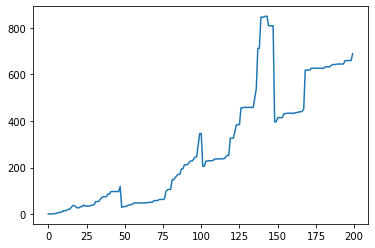

In [56]:
random.seed(69420)
np.random.seed(420)
slv3 = solver.TopPerc(base, formula, perc=.9)
vss3 = [slv3.step() for _ in range(200)]
plt.plot(list(map(len, slv3.history_full)))

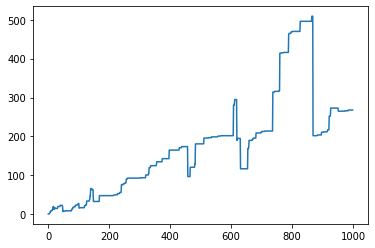

In [80]:
random.seed(69420)
np.random.seed(420)
slv4 = solver.TopPerc(base, formula, perc=.95)
vss4 = [slv4.step() for _ in range(1000)]
plt.plot(list(map(len, slv4.history_full)))

In [85]:
vss2 = np.array(vss2)
vss3 = np.array(vss3)
vss4 = np.array(vss4)

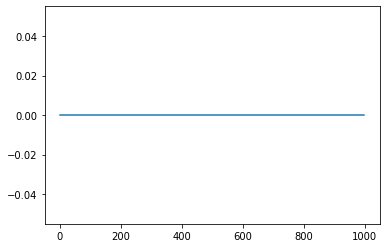

In [87]:
plt.plot(vss3 - vss2)

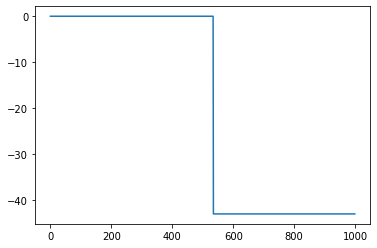

In [42]:
plt.plot(np.subtract(vss2, vss3))

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

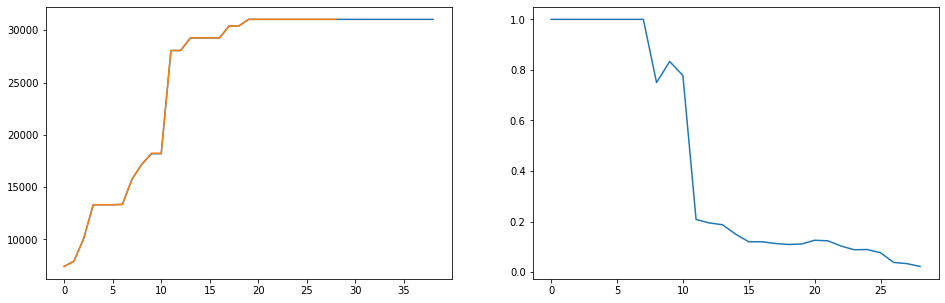

In [267]:
random.seed(69)
np.random.seed(42)

slv1 = solver.BruteForce(base, formula)
vss1 = []
p2p2 = []
dmgs = []
for _ in range(200):
    vss1.append(slv1.step())
    
    # tracking i guess
    if _ != 0:
        cur = slv1.history_full[-1]
        prv = slv1.history_full[-2]
        
        p2p = []
        for ix, qq in enumerate(cur):
            if qq in slv1.history[-1]:
                pri = slv1.config_prior[qq]
                frm = prv.index(pri)
                nw = True
            else:
                frm = prv.index(qq)
                nw = False
            p2p.append((1+frm, 1+ix, nw))
        p2p2.append(p2p)
    
    dmgs.append(list(map(lambda x: x.dmg, slv1.history_full[-1])))
    
    plt.clf()
    plt.figure(figsize=(16,5))
    plt.subplot(121)
    plt.plot(vss2[:len(vss1)+10])
    plt.plot(vss1)
    
    plt.subplot(122)
    buddy = [np.count_nonzero(np.array(d) > .8*max(d)) for d in dmgs]
    notbuddy = [len(d) for d in dmgs]
    plt.plot(np.array(buddy) / np.array(notbuddy))
    
    display.clear_output(wait=True)
    display.display(plt.gcf())
plt.clf()

In [217]:
dmgs = [list(map(lambda x: x.dmg, bub)) for bub in slv1.history_full]

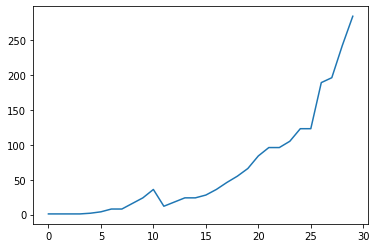

In [263]:
buddy = [np.count_nonzero(np.array(d) > .7*max(d)) for d in dmgs]
plt.plot(buddy)

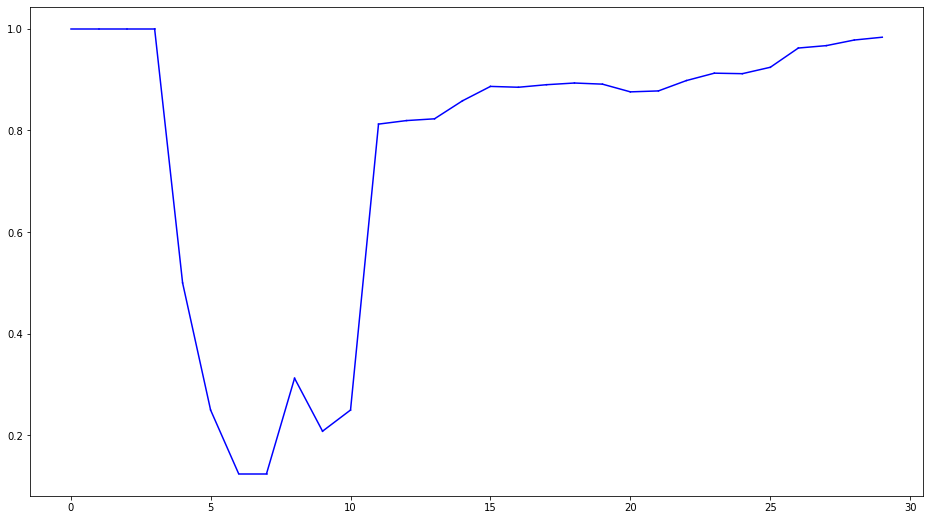

In [258]:
plt.figure(figsize=(16,9))
for i, p2p in enumerate(p2p2[:30]):
    ar = np.array(p2p)
    ma, mb, _ = np.amax(ar, axis=0)
#     a, b, cl = ar.T
    
#     if np.count_nonzero(cl==0) != 0:
#         plt.plot([i,i+1], [(ma-a[cl==0]+1)/ma,(mb-b[cl==0]+1)/mb], c='black', linewidth=.5)
#     plt.plot([i,i+1], [(ma-a[cl==1]+1)/ma,(mb-b[cl==1]+1)/mb], c='red', linewidth=.5)

    plt.plot([i, i+1], [(1+ma-buddy[i])/ma, (1+mb-buddy[i+1])/mb], c='blue')


In [189]:
slv1.artis[11]

Phys Cup@(HP:0>717, DEF%:66>124, ATK:19>19, EM:19>40)

In [120]:
i = 16
tz = sorted(slv1.history[i], reverse=True)
ty = sorted(slv1.history_full[i-1], reverse=True)

bob = []
for qq in tz:
    pri = slv1.config_prior[qq]
    bob.append(ty.index(pri))


In [108]:
bob

[0]

In [57]:
sorted(slv1.history_full[11], reverse=True)[0]

Loadout(dmg=31040.050068661378, artis=(HP Flower@(DEF%:73>263, CR:39>66, CD:54>54, ER:58>116), ATK Feath@(HP%:58>58, DEF:23>42, CD:0>272, ER:45>45), ATK% Sands@(HP:239>538, DEF%:0>66, CR:31>97, CD:70>148), Phys Cup@(HP:0>717, DEF%:66>124, ATK:19>19, EM:19>40), CR Hat@(HP:0>448, DEF%:51>109, ATK%:41>88, CD:54>116)))

In [51]:
slv1.config_prior[tz]

Loadout(dmg=28061.500415036757, artis=(HP Flower@(HP%:58>99, DEF%:73>124, ATK%:0>47, ER:45>175), ATK Feath@(HP%:47>88, DEF:21>21, ATK%:41>210, EM:0>21), ATK% Sands@(DEF:23>23, ATK:18>34, CD:70>132, EM:0>58), Phys Cup@(HP:0>717, DEF%:66>124, ATK:19>19, EM:19>40), CR Hat@(HP:0>448, DEF%:51>109, ATK%:41>88, CD:54>116)))

In [39]:
sorted(slv1.history[12], reverse=True)[0]

Loadout(dmg=27391.65909456837, artis=(HP Flower@(HP%:58>99, DEF%:73>124, ATK%:0>47, ER:45>175), ATK Feath@(HP:269>807, DEF%:51>51, DEF:16>35, CD:54>178), ATK% Sands@(DEF:23>23, ATK:18>34, CD:70>132, EM:0>58), Phys Cup@(HP:0>717, DEF%:66>124, ATK:19>19, EM:19>40), CR Hat@(HP:0>448, DEF%:51>109, ATK%:41>88, CD:54>116)))

In [34]:
sorted(slv1.history_full[11])

5376

In [83]:
anal = sorted(slv1.combos, reverse=True)

In [86]:
zz = np.array([a.dmg for a in anal])

(array([1.1130e+03, 7.3000e+03, 1.4404e+04, 1.4914e+04, 9.9830e+03,
        9.5080e+03, 1.6737e+04, 2.3985e+04, 2.2903e+04, 1.5834e+04,
        1.1158e+04, 1.0992e+04, 1.2235e+04, 1.1790e+04, 9.8950e+03,
        7.3290e+03, 5.8250e+03, 4.5220e+03, 3.9960e+03, 3.4880e+03,
        3.1980e+03, 2.8410e+03, 2.5360e+03, 2.1460e+03, 1.7860e+03,
        1.8590e+03, 1.4850e+03, 1.3520e+03, 1.0540e+03, 9.8600e+02,
        6.7900e+02, 6.8000e+02, 5.8400e+02, 4.2000e+02, 5.0000e+02,
        3.4700e+02, 3.1700e+02, 3.0600e+02, 2.4100e+02, 1.9600e+02,
        1.6100e+02, 9.1000e+01, 1.0800e+02, 4.0000e+01, 3.6000e+01,
        3.5000e+01, 1.3000e+01, 6.0000e+00, 5.0000e+00, 1.0000e+00]),
 array([ 9554.1911431 , 10124.98436853, 10695.77759397, 11266.57081941,
        11837.36404485, 12408.15727028, 12978.95049572, 13549.74372116,
        14120.5369466 , 14691.33017204, 15262.12339747, 15832.91662291,
        16403.70984835, 16974.50307379, 17545.29629922, 18116.08952466,
        18686.8827501 , 19257.

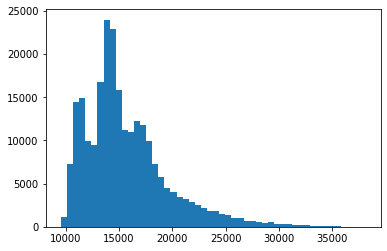

In [87]:
plt.hist(zz, bins=50)

In [73]:
for _ in range(20):
    f'Iter {len(vss1)}'
    vss1.append(slv1.step())

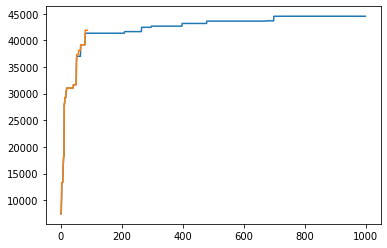

In [77]:
plt.plot(vss2)
plt.plot(vss1)

In [5]:
curves = []
c2 = []

In [24]:
c1 = []
random.seed(50)
np.random.seed(42)
for _ in range(20):
    slv = solver.Top1(base, formula)
    c1.append([slv.step() for _ in range(2000)])

In [25]:
c2 = []
random.seed(50)
np.random.seed(42)
for _ in range(20):
    slv = solver.Top2(base, formula)
    c2.append([slv.step() for _ in range(2000)])

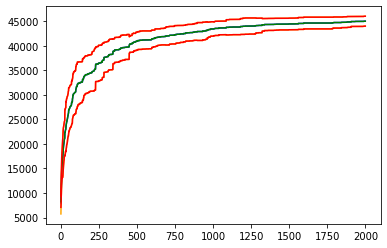

In [26]:
c1 = np.array(c1)
c2 = np.array(c2)

m1, s1 = np.mean(c1, axis=0), np.std(c1, axis=0)
m2, s2 = np.mean(c2, axis=0), np.std(c2, axis=0)
plt.plot(m1, color='b')
plt.plot(m1 + s1, color='orange')
plt.plot(m1 - s1, color='orange')
plt.plot(m2, color='green')
plt.plot(m2 + s2, color='red')
plt.plot(m2 - s2, color='red')

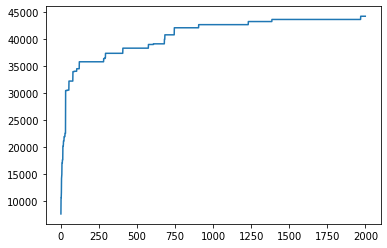

In [6]:
for _ in range(50):
    slv = solver.Top1(base, formula)
    vss = np.array([slv.step() for _ in range(2000)])
    curves.append(vss)
plt.plot(vss)

In [13]:
for _ in range(10):
    slv = solver.Top2(base, formula)
    vss2 = np.array([slv.step() for _ in range(2000)])
    c2.append(vss2)

TypeError: '<' not supported between instances of 'Artifact' and 'NoneType'

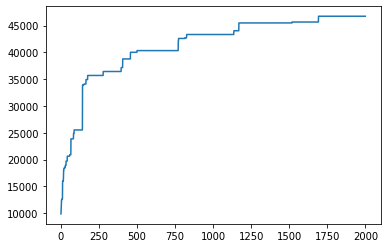

In [12]:
plt.plot(vss2)

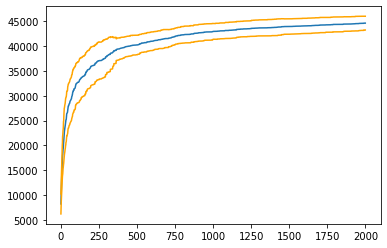

In [7]:
m1 = np.mean(curves, axis=0)
s1 = np.std(curves, axis=0)
plt.plot(m1)
plt.plot(m1 + s1, color='orange')
plt.plot(m1 - s1, color='orange')

In [5]:
class CumSolver:
    def __init__(self, stats, dmg):
        self.c = char.Character(stats, dmg)
        self.artis = []
        
        self.eqset = stats.Loadout()
        self.cur_dmg = self.c.eval()
        
        self.sets = {stats.Loadout()}
    
    def advance(self):
        a = artifact.make_arti()
        self.artis.append(a)
        
        # solver step
        self.c.equip(a)
        new_dmg = self.c.eval()
        if new_dmg >= self.cur_dmg:
            self.eqset = self.eqset.add(a)
            self.cur_dmg = new_dmg
        else:
            self.c.equip(self.eqset)
        return self.cur_dmg
    
    def solve_max(self, a):
        for s in self.sets:
            s[a.slot] 

In [37]:
np.argsort(vss[1:] - vss[:-1])[::-1]

array([ 112,   19,    1, ..., 1336, 1337,  999])

In [32]:
vss[112], vss[113]

(27286.364579186775, 31743.08867826028)

In [33]:
slv.artis[113]

Phys Cup@(HP:269>867, DEF:16>32, ER:0>110, EM:23>23)

In [95]:
eqset = [None for _ in range(5)]
c.artis = eqset.copy()
cur_dmg = c.eval()

artis = []
for _ in range(100):
    a = artifact.make_arti()
    artis.append(a)
    c.equip(a)
    
    new_dmg = c.eval()
    if new_dmg >= cur_dmg:
        eqset[a.slot] = a
        cur_dmg = new_dmg
    else:
        c.equip(eqset)
cur_dmg

34954.41928656727

In [96]:
print(f'Dmg: {c.eval(eqset)}')
for ts in ['ATK', 'CR', 'CD']:
    print(f'  {ts}: {c._bake_stats()[ts]}')
eqset

Dmg: 34954.41928656727
  ATK: 2511.1201171875
  CR: 0.3840000033378601
  CD: 1.2380000352859497


[HP Flower@(DEF:0>21, ATK%:58>99, ATK:14>30, CD:62>186),
 ATK Feath@(HP%:41>41, ATK%:41>135, CR:0>97, ER:65>65),
 ATK% Sands@(HP%:53>53, ATK:0>28, CD:70>202, EM:16>39),
 Phys Cup@(HP:269>269, ATK:0>28, CD:62>132, ER:52>156),
 ATK% Hat@(HP:239>239, ATK:14>14, CR:27>93, CD:0>218)]

In [78]:
print(f'Dmg: {c.eval(eqset)}')
for ts in ['ATK', 'CR', 'CD']:
    print(f'  {ts}: {c._bake_stats()[ts]}')
eqset

Dmg: 51990.25112449387
  ATK: 2194.360107421875
  CR: 0.8159999847412109
  CD: 1.8519999980926514


[HP Flower@(ATK%:41>152, ATK:18>18, CR:35>144, CD:54>54),
 ATK Feath@(ATK%:58>116, CR:31>62, CD:54>280, EM:19>19),
 ATK% Sands@(HP:209>209, DEF%:73>73, CR:27>101, CD:54>264),
 Phys Cup@(HP%:41>41, ATK:19>19, CR:35>179, CD:62>132),
 CD Hat@(DEF:16>39, ATK%:58>116, ATK:18>18, CR:39>136)]

In [74]:
print(f'Dmg: {c.eval(eqset)}')
for ts in ['ATK', 'CR', 'CD']:
    print(f'  {ts}: {c._bake_stats()[ts]}')
eqset

Dmg: 52511.063832588814
  ATK: 2221.47998046875
  CR: 0.9480000138282776
  CD: 1.5880000591278076


[HP Flower@(DEF:19>19, ATK%:53>53, CR:39>179, CD:62>132),
 ATK Feath@(DEF:19>19, ATK%:58>163, CR:35>97, CD:70>132),
 ATK% Sands@(HP%:58>58, ATK:16>16, CR:35>179, CD:78>148),
 Phys Cup@(HP%:58>58, ATK%:47>163, CR:27>124, CD:54>54),
 CD Hat@(ATK%:47>47, ATK:16>30, CR:39>175, EM:23>23)]

In [65]:
print(f'Dmg: {c.eval(eqset)}')
eqset

Dmg: 53961.627858173


[HP Flower@(ATK%:53>53, ATK:18>18, CR:35>35, CD:70>428),
 ATK Feath@(DEF:21>21, ATK%:58>58, CR:35>132, CD:78>218),
 ATK% Sands@(HP:299>299, DEF:16>16, CR:27>105, CD:78>288),
 Phys Cup@(HP:239>239, ATK%:41>204, CR:39>109, CD:78>78),
 CR Hat@(HP%:58>58, ATK%:47>158, ATK:19>37, CD:70>202)]

In [70]:
c._bake_stats()

[0.0000000e+00 1.7435273e+04 0.0000000e+00 7.2900000e+02 0.0000000e+00
 2.2708999e+03 8.8599998e-01 1.7140000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 5.8300000e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]

In [14]:
%timeit c.eval()

173 µs ± 19.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [8]:
a = artifact.make_arti()

In [12]:
a

ATK% Hat@(HP:0>418, DEF%:66>66, CD:54>240, EM:16>16)

In [10]:
c.artis[4] = a

In [2]:
a1 = artifact.make_arti()
a2 = artifact.make_arti()
a1, a2

(ATK% Sands@(HP%:58>198, DEF:19>19, CD:0>156, EM:23>23),
 CR Hat@(HP:239>508, DEF%:66>212, ATK:19>37, CD:70>124))

In [3]:
s = char.Stats()

In [5]:
a1 + a2

[198 508 212  19 466  37 311 280   0  23   0   0   0   0   0   0   0   0
   0]

In [47]:
%timeit artifact.make_arti()

137 µs ± 13.3 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [1099]:
slotnames = ['Flower', 'Feath', 'Sands', 'Cup', 'Circ']
# statnames = ['CR', 'CD', 'ER', 'EM', 'ATK%', 'ATK', 'HP%', 'HP', 'DEF%', 'DEF', 'Heal',
statnames = ['HP%', 'HP', 'DEF%', 'DEF', 'ATK%', 'ATK', 'CR', 'CD', 'ER', 'EM', 'Heal',
          'Phys', 'Hydro', 'Pyro', 'Cryo', 'Electro', 'Anemo', 'Geo', 'Dendro']
statmap = {n: i for i, n in enumerate(statnames)}